## $\color{SkyBlue}{\text{Establishing Year Analysis}}$
#### $\color{SkyBlue}{\text{Roman Lynch}}$


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

$\rule{27cm}{0.4pt}$
### K-Means Algorithm

In [22]:
#--------------------------------------------------------------------------------#
def dist(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)
#--------------------------------------------------------------------------------#

In [59]:
#--------------------------------------------------------------------------------#
def kMeans(df, k, tol=0.0005): 
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """    
    #---------------------------------------#
    #-- Initialize --#
    clusters = np.zeros(len(df))

    #-- k-means ++ --#
    centroids = []
    for i in range(k):
        # To intialize the centroids, we pick k datapoints (reliviley) evenly spaced from 
        # one another by Rank (due to rounding) #
        data_point_rank_k = df[df['Rank'] == np.round((i+1)*(15/k), 0)]
        centroids.append(data_point_rank_k.values[0])
    centroids = np.vstack(centroids)
    print(centroids)
    #----------------#
    
    mean_error = np.inf
    converged = False
    
    num_iterations = 0
    
    #---------------------------------------#
    #-- LOOP UNTIL CONVERGENCE --#
    while not(converged):
        
        #-- Cluster Assignment --#
        for index, data in enumerate(df.values):
            distances = [dist(data, centroid) for centroid in centroids]
            clusters[index] = np.argmin(distances)
        
        #-- Update Centroids --#
        updated_centroids = np.empty((k, df.shape[1]))
        for index in range(k):
            clust_data = df[clusters == index]
            centroid = clust_data.mean(axis=0)
            updated_centroids[index, :] = centroid
            
        #-- Calculate Meanerror --#
        errors = []
        for data, cluster in zip(df.values, clusters):
            centroid = updated_centroids[int(cluster)]
            errors.append(dist(data, centroid)**2)
        
        error_arr = np.array(errors)
        
        #-- Calculate Reconstruction Error --#
        rec_err = np.sum(error_arr)/len(df)
        
        #-- Check for Convergence --#
        if (abs(rec_err - mean_error) < tol):
            converged = True
#             print('Converged at iteration {} with a change of {}'.format(num_iterations, abs(rec_err - mean_error)))
        
        # Update Values
        centroids = updated_centroids
        mean_error = rec_err
        num_iterations = num_iterations + 1
        
    #---------------------------------------#
    return centroids, clusters, mean_error
#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Dataframe Composition

In [55]:
#--------------------------------------------------------------------------------#
# Creating the master data frame

## Read in CSV files
df_rankings = pd.read_csv("data/rankings.csv")
df_teams = pd.read_csv("data/team.csv")
df_team_details = pd.read_csv("data/team_details.csv")

## Only take important columns
df_rankings = df_rankings[['Team', 'Rank', 'Year']]
df_teams = df_teams[['full_name', 'abbreviation']]
df_team_details = df_team_details[['abbreviation', 'arenacapacity']]

## Clean "*" from all teams in df_rankings
for i in range(len(df_rankings)):
    if (df_rankings["Team"].iloc[i].find('*')):
        df_rankings["Team"].iloc[i] = df_rankings["Team"].iloc[i].replace('*', '')

## Create the master dataframe by including year_founded, city, team, and rank
df_master = pd.merge(df_rankings,df_teams, left_on="Team", right_on="full_name")
df_master = pd.merge(df_master,df_team_details, left_on="abbreviation", right_on ="abbreviation")
#--------------------------------------------------------------------------------#

print(df_master.head(5))

             Team  Rank  Year       full_name abbreviation  arenacapacity
0  Denver Nuggets     1  2023  Denver Nuggets          DEN        21000.0
1  Denver Nuggets     6  2022  Denver Nuggets          DEN        21000.0
2  Denver Nuggets     4  2021  Denver Nuggets          DEN        21000.0
3  Denver Nuggets     3  2020  Denver Nuggets          DEN        21000.0
4  Denver Nuggets     2  2019  Denver Nuggets          DEN        21000.0


In [56]:
#--------------------------------------------------------------------------------#
# Break the data up by year
df_16 = df_master[df_master["Year"] == 2016]
df_17 = df_master[df_master["Year"] == 2017]
df_18 = df_master[df_master["Year"] == 2018]
df_19 = df_master[df_master["Year"] == 2019]
df_20 = df_master[df_master["Year"] == 2020]
df_21 = df_master[df_master["Year"] == 2021]
df_22 = df_master[df_master["Year"] == 2022]
df_23 = df_master[df_master["Year"] == 2023]

print(df_16.shape[0])
print(df_17.shape[0])
print(df_18.shape[0])
print(df_19.shape[0])
print(df_20.shape[0])
print(df_21.shape[0])
print(df_22.shape[0])
print(df_23.shape[0])
#--------------------------------------------------------------------------------#

30
30
30
30
30
30
30
30


$\rule{27cm}{0.4pt}$ 
### Perform K-means with k = 3

In [60]:
#--------------------------------------------------------------------------------#
## Use k-Means for clustering withk = 3
centroids_23, clusters_23, mean_error_23 = kMeans(df_23[["Rank", "arenacapacity"]], k=3)
centroids_22, clusters_22, mean_error_22 = kMeans(df_22[["Rank", "arenacapacity"]], k=3)
centroids_21, clusters_21, mean_error_21 = kMeans(df_21[["Rank", "arenacapacity"]], k=3)
centroids_20, clusters_20, mean_error_20 = kMeans(df_20[["Rank", "arenacapacity"]], k=3)
centroids_19, clusters_19, mean_error_19 = kMeans(df_19[["Rank", "arenacapacity"]], k=3)
centroids_18, clusters_18, mean_error_18 = kMeans(df_18[["Rank", "arenacapacity"]], k=3)
centroids_17, clusters_17, mean_error_17 = kMeans(df_17[["Rank", "arenacapacity"]], k=3)
centroids_16, clusters_16, mean_error_16 = kMeans(df_16[["Rank", "arenacapacity"]], k=3)
#--------------------------------------------------------------------------------#

[[5.0000e+00 1.8064e+04]
 [1.0000e+01 1.8203e+04]
 [1.5000e+01 1.8104e+04]]
[[5.0000e+00 2.0000e+04]
 [1.0000e+01 1.8694e+04]
 [1.5000e+01 1.8104e+04]]
[[5.0000e+00 1.9060e+04]
 [1.0000e+01 1.8064e+04]
 [1.5000e+01 1.8104e+04]]
[[5.0000e+00 1.8104e+04]
 [1.0000e+01 1.7791e+04]
 [1.5000e+01 1.8064e+04]]
[[5.0000e+00 2.0000e+04]
 [1.0000e+01 1.9060e+04]
 [1.5000e+01 1.8422e+04]]
[[5.0000e+00 1.7791e+04]
 [1.0000e+01 1.9060e+04]
 [1.5000e+01 1.8422e+04]]
[[5.0000e+00 1.9060e+04]
 [1.0000e+01 1.7791e+04]
 [1.5000e+01 1.8422e+04]]
[[5.000e+00 1.998e+04]
 [1.000e+01 2.100e+04]
 [1.500e+01 1.906e+04]]


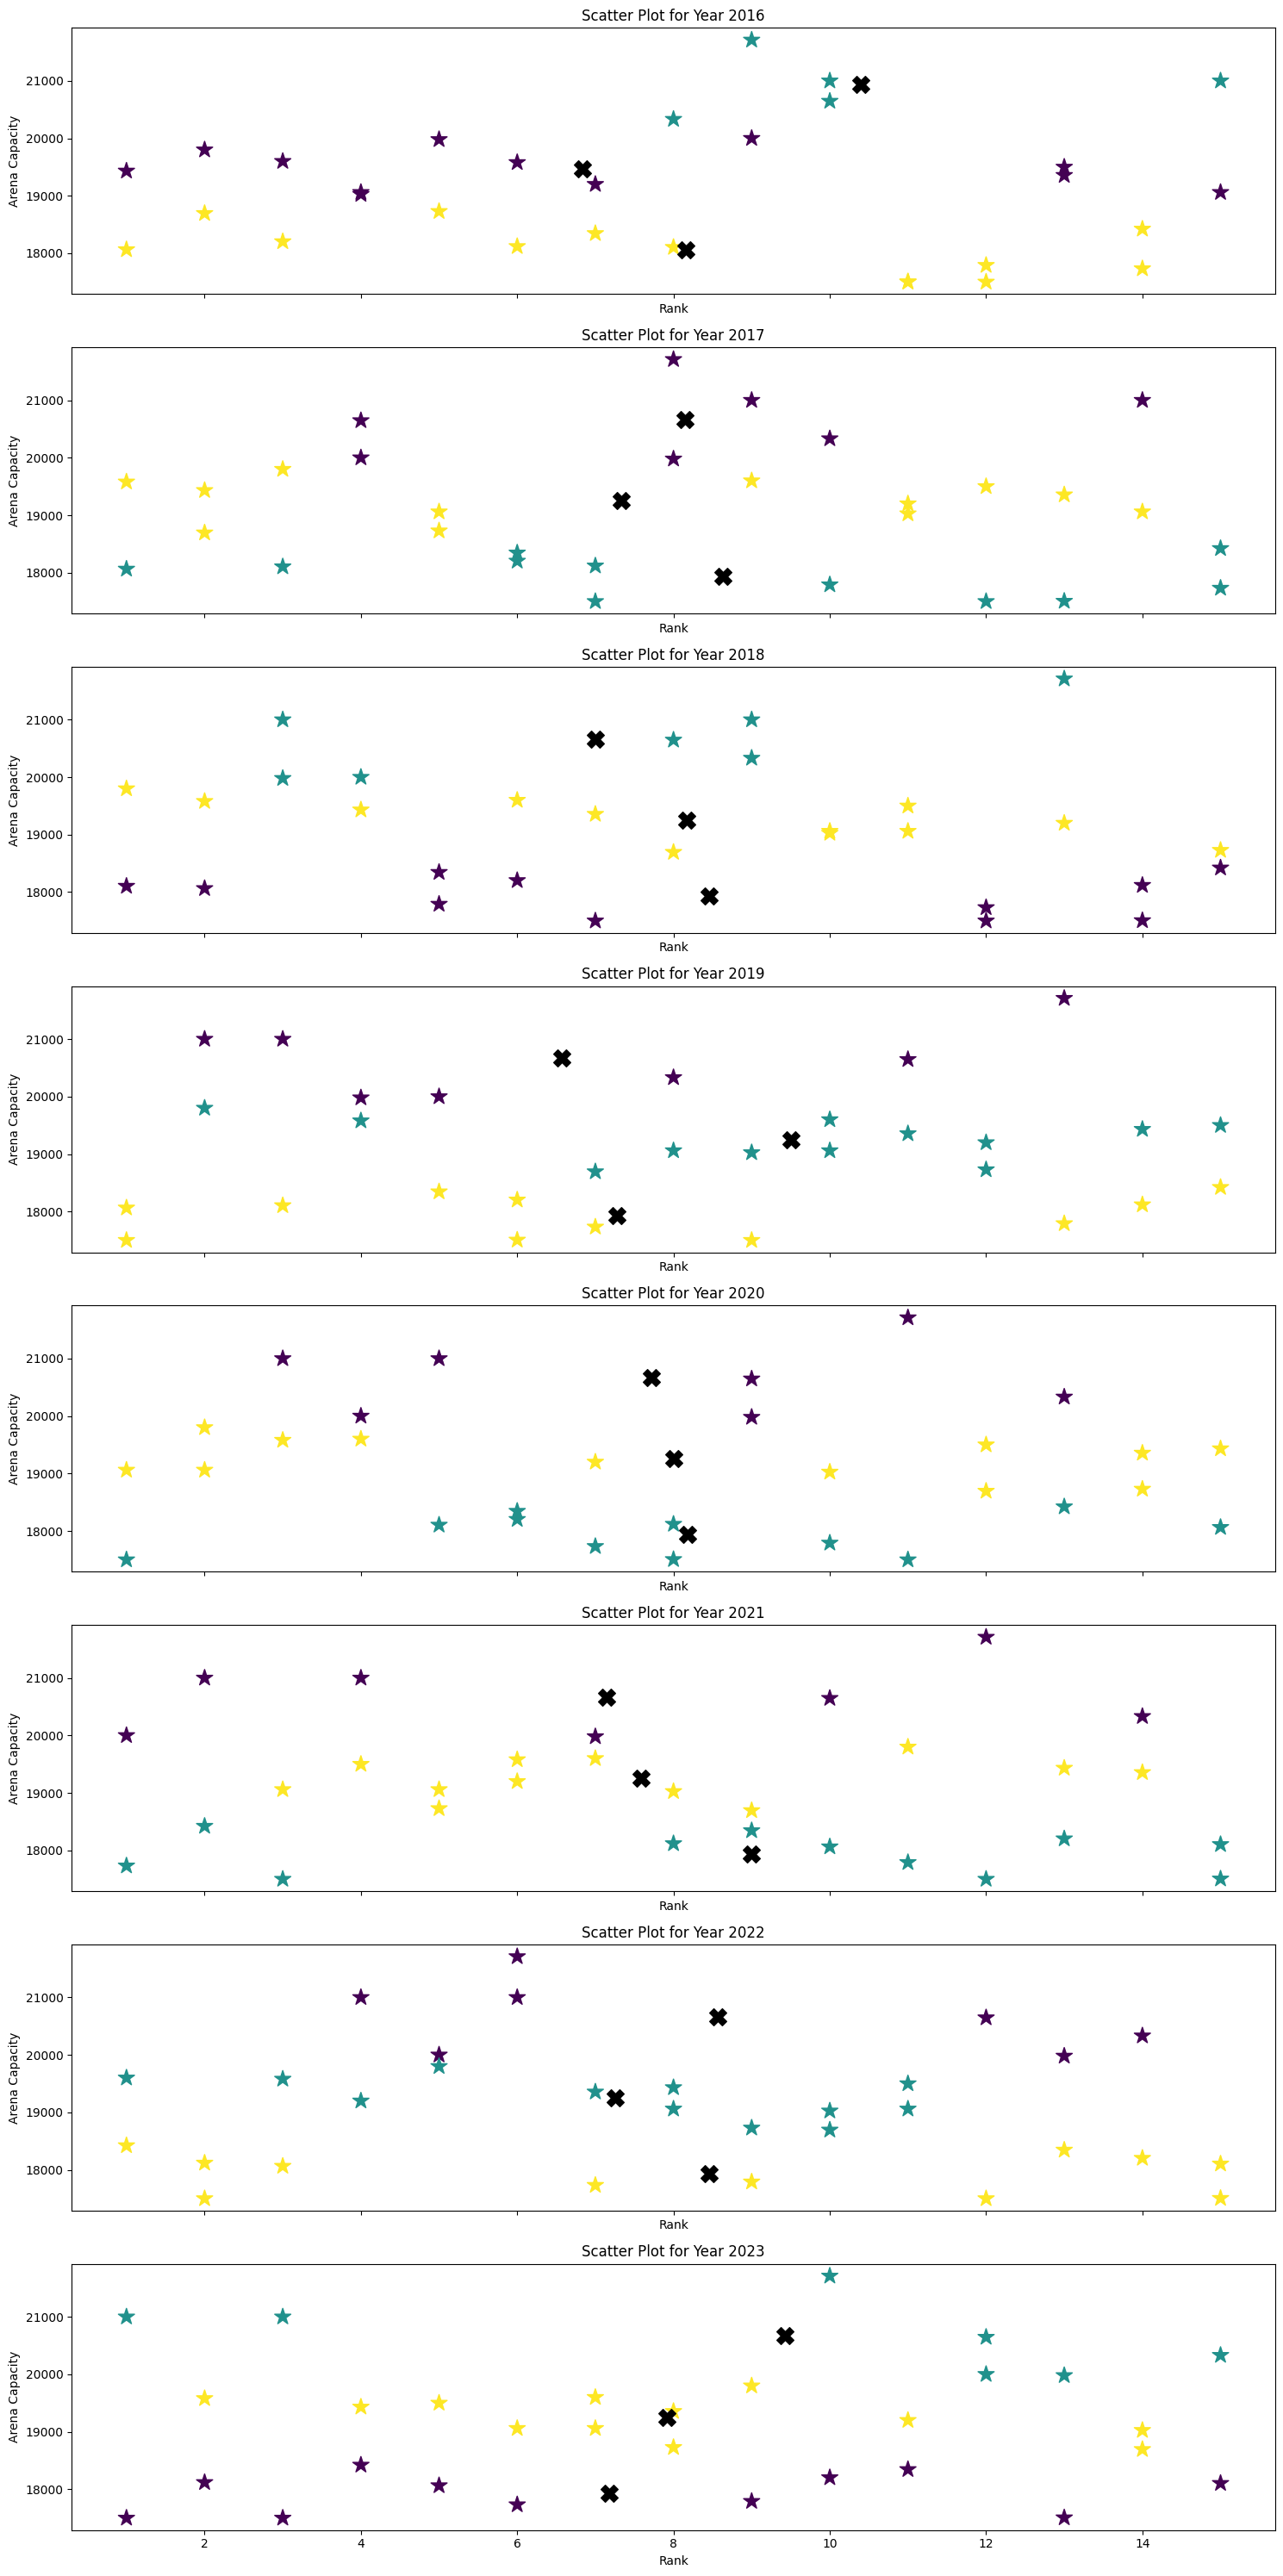

In [58]:
#--------------------------------------------------------------------------------#
# Organize output
dataframes = [df_16, df_17, df_18, df_19, df_20, df_21, df_22, df_23]
clusters = [clusters_16, clusters_17, clusters_18, clusters_19, clusters_20, clusters_21, clusters_22, clusters_23]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
centroids = [centroids_16, centroids_17, centroids_18,centroids_19,centroids_20, centroids_21, centroids_22, centroids_23]
#--------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------#
# Plot the data

## Initialize Plot
fig, axes = plt.subplots(8, 1, figsize=(15, 30), sharex=True)

## Loop: Scatter Plot for each Year
for i, (year, dataframe, cluster) in enumerate(zip(years, dataframes, clusters)):
    ax = axes[i]
    ax.scatter(dataframe['Rank'], dataframe['arenacapacity'], c=cluster, marker='*', s=200)
    ax.set_xlabel("Rank")
    ax.set_ylabel("Arena Capacity")
    ax.set_title("Scatter Plot for Year " + str(year))
    ## Plot centroids
    ax.scatter(centroids[i][:, 0], centroids[i][:, 1], marker='X', s=200, c='black')

plt.tight_layout()
plt.show()

plt.show()
#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Analysis

As evident by the above scatterplots, there does not appear to be a correlation between the capacity of the stadium and the final rank of an NBA team.

Our origional hypothesis was that teams with stadiums of high capacity, have lots of fans. If you've ever heard the phrase "Home team advantage," we wanted to see if more fans meant better performance.

If this were to be the case we would see 3 discrete clusters.
1. High rank, high capacity
2. Medium rank, medium capacity
3. Low rank, low capacity.

Instead, they are clustered by capacity, and rank does not appear to have an affect on the clusters. As a result, we can conclude that there is no correlation between the capacity of the stadium and the final rank of an NBA team.